In [39]:
import numpy as np 
import matplotlib.pyplot as plt
import os
print(os.getcwd())
script_dir = os.getcwd()

/home/mingxuan/Repositories/scg_tsung/benchmarking_sim/quadrotor/plotting


In [40]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w) / w, mode='valid')
    
def load_from_log_file(path):
    '''Return x, y sequence data from the stat csv.'''
    with open(path, 'r') as f:
        lines = f.readlines()
    # Labels.
    xk, yk = [k.strip() for k in lines[0].strip().split(',')]
    # Values.
    x, y = [], []
    for line in lines[1:]:
        data = line.strip().split(',')
        x.append(float(data[0].strip()))
        y.append(float(data[1].strip()))
    x = np.array(x)
    y = np.array(y)
    return xk, x, yk, y

In [41]:
colors = {
    "ref": "black",
    "PPO": "darkorange",
    "SAC": "red",
    "TD3": "tab:cyan",
    "DPPO": "pink",
    "GP-MPC": "royalblue",
    "iLQR": "slateblue",
    'LQR': 'blueviolet',
    "Linear MPC": "green",
    "MPC": "aqua",
    "F-MPC": "darkblue",
    'PID': 'tab:gray',
}
plot_colors = {
    'GP-MPC': 'royalblue',
    'PPO': 'darkorange',
    'SAC': 'red',
    'DPPO': 'pink',
    'iLQR': 'darkgray',
    'Linear MPC': 'green',
    'Nonlinear MPC': 'cadetblue',
    "PID": "tab:gray",
    "iLQR": "slateblue",
    'LQR': 'blueviolet',
    "F-MPC": "darkblue",
    'MAX': 'none',
    'MIN': 'none',
}

ref_color = 'black'

gpmpc_color = 'royalblue'
gpmpc_hull_color = 'cornflowerblue'
lmpc_color = 'green'
lmpc_hull_color = 'lightgreen'
mpc_color = 'aqua'
mpc_hull_color = 'paleturquoise'

ppo_color = 'darkorange'
ppo_hull_color = 'moccasin'
sac_color = 'red'
sac_hull_color = 'salmon'
td3_color = 'pink'
td3_hull_color = 'lavenderblush'



legends = {
    "ref": "black",
    "PPO": "PPO",
    "PPO3": "PPO with ilqr ref",
    "PPO4": "PPO with ilqr state ref",
    "SAC": "SAC",
    "TD3": "TD3",
    "DPPO": "DPPO",
    "GP-MPC": "GP-MPC",
    "F-MPC": "F-MPC",
}

In [42]:
seeds = [i for i in range(0,5)]

data_paths = {
            # "PPO": "/home/mingxuan/Repositories/scg_tsung/benchmarking_sim/quadrotor/data/quadrotor_2D_attitude_ppo_data8/",
            # "PPO": "/home/mingxuan/Repositories/scg_tsung/benchmarking_sim/quadrotor/data/quadrotor_2D_attitude_ppo_data4/",
            "SAC": "/home/mingxuan/Repositories/scg_tsung/benchmarking_sim/quadrotor/data/quadrotor_2D_attitude_sac_data2/",
            # "DPPO": "/home/mingxuan/Repositories/scg_tsung/benchmarking_sim/quadrotor/data/quadrotor_2D_attitude_dppo_data8/",
            # "DPPO": "/home/mingxuan/Repositories/scg_tsung/benchmarking_sim/quadrotor/data/quadrotor_2D_attitude_dppo_data6/",
            "PPO": "/home/mingxuan/Repositories/scg_tsung/benchmarking_sim/quadrotor/data/quadrotor_2D_attitude_ppo_data4/",
            "DPPO": "/home/mingxuan/Repositories/scg_tsung/benchmarking_sim/quadrotor/data/quadrotor_2D_attitude_dppo_data2/",
}

### Convergence plot

In [43]:

perf_data = {}
for method in data_paths.keys():
    print(method)
    perf_data.update({method: {}})
    temp = [x for x in os.listdir(data_paths[method])]
    for sd in os.listdir(data_paths[method]):
        seed = sd[4]
        xk, x, lk, l = load_from_log_file(data_paths[method] +"/"+sd+ "/logs/stat_eval/ep_length.log")
        xk, x, yk, y = load_from_log_file(data_paths[method] +"/"+sd+ "/logs/stat_eval/ep_return.log")
        xk, x, zk, z = load_from_log_file(data_paths[method] +"/"+sd+ "/logs/stat_eval/ep_return_std.log")
        # xk, x, ck, c = load_from_log_file(data_paths[method] + str(seed) + "/logs/stat_eval/constraint_violation.log")
        # perf_data[method].update({seed: {"x": x, "y": y, "c": c}})
        # perf_data[method].update({seed: {"x": x, "y": y, "z": z, "c": c}})
        xk, x, yk, m = load_from_log_file(data_paths[method] +"/"+sd+ "/logs/stat_eval/rmse.log")
        xk, x, yk, n = load_from_log_file(data_paths[method] +"/"+sd+ "/logs/stat_eval/rmse_std.log")
        # perf_data[method].update({"x": x, "y": y, "z": z, "x1": x1, "y1": y1, "z1": z1})
        perf_data[method].update({int(seed): {"data": x, "ep_return": y, "ep_return_std": z, "rmse": m, "rmse_std": n, "ep_length": l}})

SAC
PPO
DPPO


In [44]:
perf_data["PPO"][0].keys()

dict_keys(['data', 'ep_return', 'ep_return_std', 'rmse', 'rmse_std', 'ep_length'])

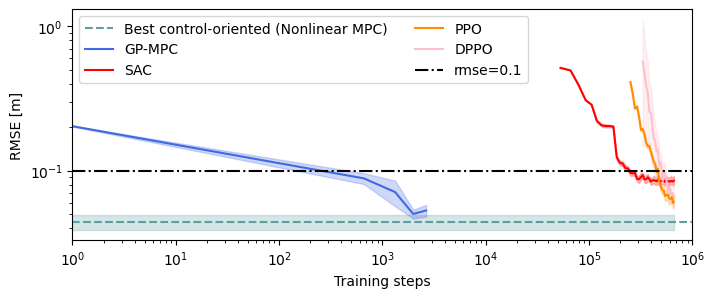

In [45]:
eval_data = {}
w = 1
fig = plt.figure(figsize=(8, 3)) 
mean_fn = np.percentile
perc = 90
n_seeds = 10
last_iter = perf_data["PPO"][0]["data"][-1]
seeds = [i for i in range(0, n_seeds)]
# last_iter = 3e5

# # PID
# p1 = 0.08250423980732591
# p2 = 0.004362996364150534
# plt.axhline(xmin=0.0, xmax=1.95, y=p1, linestyle='--', color=plot_colors["PID"], label='PID')
# plt.fill_between([0.0, last_iter], p1-w*p2, p1+w*p2, color=plot_colors["PID"], alpha=0.25)

# # LQR
# p1 = 0.1294216883185255
# p2 = 0.0024129703900749554
# plt.axhline(xmin=0.0, xmax=1.95, y=p1, linestyle='--', color=plot_colors["LQR"], label='LQR')
# plt.fill_between([0.0, last_iter], p1-w*p2, p1+w*p2, color=plot_colors["LQR"], alpha=0.25)

# # iLQR
# p1 = 0.051255378658864446
# p2 = 0.005692145991744724
# plt.axhline(xmin=0.0, xmax=1.95, y=p1, linestyle='--', color=plot_colors["iLQR"], label='iLQR')
# plt.fill_between([0.0, last_iter], p1-w*p2, p1+w*p2, color=plot_colors["iLQR"], alpha=0.25)

# Linear MPC
# p1 = 0.06556989411791102
# p2 = 0.0035402446045955343
# plt.axhline(xmin=0.0, xmax=1.95, y=p1, linestyle='--', color=plot_colors["Linear MPC"], label='Linear MPC')
# plt.fill_between([0.0, last_iter], p1-w*p2, p1+w*p2, color=plot_colors["Linear MPC"], alpha=0.25)

# Nonlinear MPC
p1 = 0.04421752503119518
p2 = 0.005051390779798208
plt.axhline(xmin=0.0, xmax=1.95, y=p1, linestyle='--', color=plot_colors["Nonlinear MPC"], label='Best control-oriented (Nonlinear MPC)')
plt.fill_between([0.0, last_iter], p1-w*p2, p1+w*p2, color=plot_colors["Nonlinear MPC"], alpha=0.25)

# # F-MPC
# p1 = 0.05599325343755744
# p2 = 0.004517153272013717
# plt.axhline(xmin=0.0, xmax=1.95, y=p1, linestyle='--', color=plot_colors["F-MPC"], label='F-MPC')
# plt.fill_between([0.0, last_iter], p1-w*p2, p1+w*p2, color=plot_colors["F-MPC"], alpha=0.25)

gp_mpc_data = np.load("/home/mingxuan/Repositories/scg_tsung/benchmarking_sim/quadrotor/data/gpmpc.npy", allow_pickle=True).item()
# start_iter = last_iter - gp_mpc_data['train_steps'][-1]
plt.plot(gp_mpc_data['train_steps']+1, mean_fn(gp_mpc_data['rmse'], perc, axis=0), color=plot_colors["GP-MPC"], label='GP-MPC')
plt.fill_between(gp_mpc_data['train_steps']+1, 
                 np.clip(mean_fn(gp_mpc_data['rmse'], perc, axis=0)-w*gp_mpc_data['rmse'].std(axis=0), 0, 10), 
                 np.clip(mean_fn(gp_mpc_data['rmse'], perc, axis=0)+w*gp_mpc_data['rmse'].std(axis=0), 0, 10), 
                 color=plot_colors["GP-MPC"], alpha=0.25)

# start_iter = last_iter - gp_mpc_data['train_steps'][-1]
for t, method in enumerate(data_paths.keys()):
    temp = np.zeros((n_seeds, 6, perf_data[method][seeds[0]]["data"].shape[0]))
    for seed in seeds:
        temp[seed, 0, :] = perf_data[method][seed]["data"]
        temp[seed, 1, :] = perf_data[method][seed]["ep_return"]
        temp[seed, 2, :] = perf_data[method][seed]["ep_return_std"]
        temp[seed, 3, :] = perf_data[method][seed]["rmse"]
        temp[seed, 4, :] = perf_data[method][seed]["rmse_std"]
        temp[seed, 5, :] = perf_data[method][seed]["ep_length"]
    j_max = 0
    for seed in seeds:
        for j,k in enumerate(temp[seed, 0, :]):
            if temp[seed, 5, j] < 660:
                temp[seed, 1, j] = np.nan
                temp[seed, 2, j] = np.nan
                temp[seed, 3, j] = np.nan
                temp[seed, 4, j] = np.nan
                if j >= j_max:
                    j_max = j+1
    eval_data.update({method: temp})

    plt.plot(temp[0,0,:], mean_fn(temp[:,3,:], perc, axis=0), color=plot_colors[method], label=legends[method])
    plt.fill_between(temp[0,0,:], 
                     0.0+np.clip(mean_fn(temp[:,3,:]-temp[:,4,:], perc, axis=0), 0, 10),  
                     0.0+np.clip(mean_fn(temp[:,3,:]+temp[:,4,:], perc, axis=0), 0, 10), color=plot_colors[method], alpha=0.25)
# s = 1 # time std
# rmse_ilqr_mean = 0.026000000000000002 * 0
# rmse_ilqr_std = 0.001843908891458577 * 0
plt.axhline(xmin=0.0, xmax=1.95, y=0.1, linestyle='-.', color='k', label='rmse=0.1')
# plt.fill_between([0.0, last_iter], rmse_ilqr_mean-s*rmse_ilqr_std, rmse_ilqr_mean+s*rmse_ilqr_std, color=colors["iLQR"], alpha=0.25)

# real experiment data
# plt.plot(last_iter, 0.086, color=colors['PPO'], marker='x')
# plt.plot(last_iter, 0.064, color=colors['SAC'], marker='x')

plt.legend(ncol=2, loc='upper left')
# plt.xlim(-10000, 460000)
# plt.xlim(1,20000)
plt.xlim(1, 1e6)
log_x = True
# log_x = False
log_y = True
# log_y = False
plt.xscale("log") if log_x else None
plt.yscale("log") if log_y else None
# plt.text(900, 0.3, "Unssucessful evaluation runs", bbox=dict(facecolor='red', alpha=0.25))
# plt.xlabel("Training steps [s]")
plt.xlabel("Training steps")
plt.ylabel("RMSE [m]")
#plt.title("Task: Quadrotor 2D")
if log_x and log_y:
    plt.savefig("performance_logxy.pdf",bbox_inches="tight", pad_inches=0.1)
elif log_x:
    plt.savefig("performance_logx.pdf",bbox_inches="tight", pad_inches=0.1)
else:
    plt.savefig("performance_linearx.pdf",bbox_inches="tight", pad_inches=0.1)

plt.savefig("performance_logxy_best_mb_step.pdf",bbox_inches="tight", pad_inches=0.1)

In [46]:
episode_len_list = [9, 10, 11, 12, 13, 14, 15]
episode_period_list =  [episode_len_list[i]/2 for i in range(len(episode_len_list))]
episode_period_list

[4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5]

In [47]:
# transfer_metric['PPO']['rmse'][1] = 0.01746153113470009
# transfer_metric['DPPO']['rmse'][1] = 0.01931011838369746

In [48]:
# matching tag
SYS = 'quadrotor_2D_attitude'
tag_ctrl_list = {
    'iLQR': 'ilqr',
    'LQR': 'lqr',
    'PID': 'pid',
    'Linear MPC': 'linear_mpc_acados',
    'Nonlinear MPC': 'mpc_acados',
    'F-MPC': 'fmpc',
    'GP-MPC': 'gpmpc_acados_TP' if SYS == 'quadrotor_2D_attitude' else 'gpmpc_acados_TRP',
}

In [49]:
# def load_transfer_metric(method):
# method = 'iLQR'
# transfer_metric = {'ilqr': {'rmse': [], 'rmse_std': []}}
                   
def load_metric(transfer_metric, method):
    ctrl = tag_ctrl_list[method]
    res = np.load(
        f'{script_dir}/../data/{ctrl}_{SYS}_gen_results.npy', allow_pickle=True).item()
    transfer_metric[method] = {'rmse': [], 'rmse_std': []}
    for T in episode_len_list:
        T = '_'+str(T)
        transfer_metric[method]['rmse'].append(res[T]['mean_rmse'])
        transfer_metric[method]['rmse_std'].append(res[T]['std_rmse'])
    transfer_metric[method]['rmse'] = np.array(transfer_metric[method]['rmse'])
    transfer_metric[method]['rmse_std'] = np.array(transfer_metric[method]['rmse_std'])
    return transfer_metric


In [50]:

transfer_metric = {'PPO': {'rmse': np.array([0.14263671, 0.07745577, 0.04944359, 0.05442781, 0.07230561,
         0.09154557, 0.10946506]),
  'rmse_std': np.array([0.002388  , 0.00131584, 0.00055094, 0.00077109, 0.00104489,
         0.00106018, 0.00117147])},
 'SAC': {'rmse': np.array([0.11052249, 0.07995861, 0.06911531, 0.065863  , 0.06632527,
         0.0684324 , 0.07096967]),
  'rmse_std': np.array([0.0004845 , 0.0004951 , 0.00037766, 0.00037758, 0.0002229 ,
         0.00017705, 0.00019964])},
 'DPPO': {'rmse': np.array([0.14777681, 0.07979613, 0.05183557, 0.06036311, 0.07921783,
         0.10040337, 0.11818952]),
  'rmse_std': np.array([0.00265774, 0.00153236, 0.00065804, 0.00138069, 0.00166916,
         0.00160406, 0.00180456])}}

transfer_metric = load_metric(transfer_metric, 'iLQR')
transfer_metric = load_metric(transfer_metric, 'F-MPC')
transfer_metric = load_metric(transfer_metric, 'Nonlinear MPC')
transfer_metric = load_metric(transfer_metric, 'Linear MPC')
transfer_metric = load_metric(transfer_metric, 'PID')
transfer_metric = load_metric(transfer_metric, 'LQR')
transfer_metric = load_metric(transfer_metric, 'GP-MPC')
transfer_metric

{'PPO': {'rmse': array([0.14263671, 0.07745577, 0.04944359, 0.05442781, 0.07230561,
         0.09154557, 0.10946506]),
  'rmse_std': array([0.002388  , 0.00131584, 0.00055094, 0.00077109, 0.00104489,
         0.00106018, 0.00117147])},
 'SAC': {'rmse': array([0.11052249, 0.07995861, 0.06911531, 0.065863  , 0.06632527,
         0.0684324 , 0.07096967]),
  'rmse_std': array([0.0004845 , 0.0004951 , 0.00037766, 0.00037758, 0.0002229 ,
         0.00017705, 0.00019964])},
 'DPPO': {'rmse': array([0.14777681, 0.07979613, 0.05183557, 0.06036311, 0.07921783,
         0.10040337, 0.11818952]),
  'rmse_std': array([0.00265774, 0.00153236, 0.00065804, 0.00138069, 0.00166916,
         0.00160406, 0.00180456])},
 'iLQR': {'rmse': array([0.22049324, 0.06491834, 0.05198803, 0.04296068, 0.05133129,
         0.05448832, 0.05057171]),
  'rmse_std': array([0.00147174, 0.00138496, 0.00081222, 0.00078685, 0.0238139 ,
         0.02166323, 0.01812374])},
 'F-MPC': {'rmse': array([0.08518393, 0.07061051, 0.05

In [51]:
# transfer_metric['iLQR']['rmse']= \
# np.array([
#     0.22049324, 0.06491834, 0.05198803, 0.04296068, 
#          0.03633649+np.random.rand()*0.002,
#          0.03125485+np.random.rand()*0.002, 
#          0.02725168+np.random.rand()*0.002
# ])

In [52]:
# type(transfer_metric['PPO'])

iLQR
Nonlinear MPC
GP-MPC
F-MPC
Linear MPC
PID
LQR


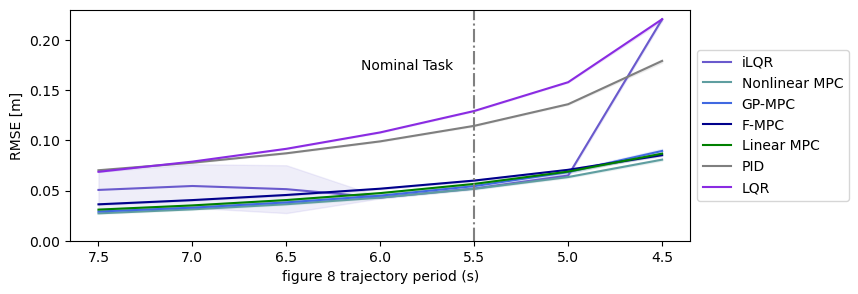

In [53]:
fig = plt.figure(figsize=(8, 3))
plot_list = [
    # 'PPO', 'SAC', 'DPPO',
    # 'PPO', 'DPPO',
    # 'Linear MPC', 'Nonlinear MPC', 'GP-MPC', 'F-MPC',
    # # 'Nonlinear MPC', 'GP-MPC', 'PID'
    # 'PID', 'iLQR', 'LQR'
    'iLQR', 'Nonlinear MPC', 'GP-MPC', 'F-MPC','Linear MPC',
    'PID', 'LQR'
]
for method in plot_list:
    print(method)
    # if method == 'DPPO':
    #     plt.plot(episode_period_list, transfer_metric[method]['rmse'], label=method, linestyle='--', color=plot_colors[method])
    #     plt.fill_between(episode_period_list, 
    #                  transfer_metric[method]['rmse']-transfer_metric[method]['rmse_std'],  
    #                  transfer_metric[method]['rmse']+transfer_metric[method]['rmse_std'], color=plot_colors[method], alpha=0.1)
    # else:
    plt.plot(episode_period_list, transfer_metric[method]['rmse'], label=method, color=plot_colors[method])
    plt.fill_between(episode_period_list, 
                        transfer_metric[method]['rmse']-transfer_metric[method]['rmse_std'],  
                        transfer_metric[method]['rmse']+transfer_metric[method]['rmse_std'], color=plot_colors[method], alpha=0.1)
plt.axvline(x=5.5, linestyle='-.', color='gray')
plt.text(6.1, 0.17, 'Nominal Task')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0,0.23)
# plt.ylim(0,0.7)
#plt.xlim(0,50)
plt.gca().invert_xaxis()
plt.xlabel("figure 8 trajectory period (s)")
plt.ylabel("RMSE [m]")
plt.savefig("generalization_curve.pdf",bbox_inches="tight", pad_inches=0.1)

In [54]:
# convert the transfer metric to a table
# one axis is the method, the other axis is the episode length [s]
# the data in the format of mean +/- std
import pandas as pd
transfer_metric_table = {}
for method in plot_list:
    transfer_metric_table[method] = {}
    for i, T in enumerate(episode_len_list):
        transfer_metric_table[method][T] = f"{transfer_metric[method]['rmse'][i]:.3f} +/- {transfer_metric[method]['rmse_std'][i]:.3f}"
# add unit [s] to the axis text
pd.DataFrame(transfer_metric_table)
# save the table to a pdf
# df = pd.DataFrame(transfer_metric_table)
# df.to_latex("generalization_curve_table.tex")



,iLQR,Nonlinear MPC,GP-MPC,F-MPC,Linear MPC,PID,LQR
9,0.220 +/- 0.001,0.081 +/- 0.001,0.089 +/- 0.002,0.085 +/- 0.001,0.087 +/- 0.001,0.179 +/- 0.002,0.220 +/- 0.001
10,0.065 +/- 0.001,0.063 +/- 0.001,0.068 +/- 0.002,0.071 +/- 0.001,0.069 +/- 0.001,0.136 +/- 0.001,0.158 +/- 0.000
11,0.052 +/- 0.001,0.052 +/- 0.001,0.054 +/- 0.001,0.060 +/- 0.001,0.057 +/- 0.001,0.114 +/- 0.000,0.129 +/- 0.000
12,0.043 +/- 0.001,0.043 +/- 0.001,0.045 +/- 0.001,0.052 +/- 0.001,0.047 +/- 0.001,0.099 +/- 0.000,0.108 +/- 0.000
13,0.051 +/- 0.024,0.036 +/- 0.001,0.038 +/- 0.001,0.046 +/- 0.001,0.041 +/- 0.001,0.087 +/- 0.000,0.092 +/- 0.000
14,0.054 +/- 0.022,0.031 +/- 0.001,0.033 +/- 0.001,0.040 +/- 0.001,0.035 +/- 0.001,0.078 +/- 0.000,0.079 +/- 0.000
15,0.051 +/- 0.018,0.027 +/- 0.001,0.029 +/- 0.001,0.036 +/- 0.001,0.031 +/- 0.001,0.070 +/- 0.000,0.069 +/- 0.000


In [55]:
df = pd.DataFrame()
# for method in plot_list:
#     df[method] = transfer_metric[method]['rmse']
# df.index = episode_len_list
# df

In [56]:
transfer_metric

{'PPO': {'rmse': array([0.14263671, 0.07745577, 0.04944359, 0.05442781, 0.07230561,
         0.09154557, 0.10946506]),
  'rmse_std': array([0.002388  , 0.00131584, 0.00055094, 0.00077109, 0.00104489,
         0.00106018, 0.00117147])},
 'SAC': {'rmse': array([0.11052249, 0.07995861, 0.06911531, 0.065863  , 0.06632527,
         0.0684324 , 0.07096967]),
  'rmse_std': array([0.0004845 , 0.0004951 , 0.00037766, 0.00037758, 0.0002229 ,
         0.00017705, 0.00019964])},
 'DPPO': {'rmse': array([0.14777681, 0.07979613, 0.05183557, 0.06036311, 0.07921783,
         0.10040337, 0.11818952]),
  'rmse_std': array([0.00265774, 0.00153236, 0.00065804, 0.00138069, 0.00166916,
         0.00160406, 0.00180456])},
 'iLQR': {'rmse': array([0.22049324, 0.06491834, 0.05198803, 0.04296068, 0.05133129,
         0.05448832, 0.05057171]),
  'rmse_std': array([0.00147174, 0.00138496, 0.00081222, 0.00078685, 0.0238139 ,
         0.02166323, 0.01812374])},
 'F-MPC': {'rmse': array([0.08518393, 0.07061051, 0.05

### Robustness metric

In [58]:
# noise_option = 'obs_noise'
# noise_option = 'proc_noise'
noise_option = 'downwash'

In [59]:
linear_mpc_data = np.load(f'{script_dir}/../data/{noise_option}_results_linear_mpc_acados.npy', allow_pickle=True).item()
mpc_data = np.load(f'{script_dir}/../data/{noise_option}_results_mpc_acados.npy', allow_pickle=True).item()
gpmpc_data = np.load(f'{script_dir}/../data/{noise_option}_results_gpmpc_acados_TP.npy', allow_pickle=True).item()
ilqr_data = np.load(f'{script_dir}/../data/{noise_option}_results_ilqr.npy', allow_pickle=True).item()
lqr_data = np.load(f'{script_dir}/../data/{noise_option}_results_lqr.npy', allow_pickle=True).item()
pid_data = np.load(f'{script_dir}/../data/{noise_option}_results_pid.npy', allow_pickle=True).item()
fmpc_data = np.load(f'{script_dir}/../data/{noise_option}_results_fmpc.npy', allow_pickle=True).item()



noise_data = {
              'Linear MPC': linear_mpc_data, 
              'Nonlinear MPC': mpc_data, 
              'GP-MPC': gpmpc_data,
              'iLQR': ilqr_data,
              'LQR': lqr_data,
              'PID': pid_data,
              'F-MPC': fmpc_data,
              } 
if noise_option in ['obs_noise', 'proc_noise']:
    # noise_scale = [0,1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
    noise_scale = [0,1,2,3,4,5,10,15,20,25,\
                     30,40,50,60,70,80,90,100]
elif noise_option == 'downwash':
    # noise_scale = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
    noise_scale = mpc_data['0']['noise_factor']
    noise_scale.sort()
    print(noise_scale)

[0.009706812814463842, 0.011197536533165667, 0.01304925512045966, 0.015400929281194062, 0.018437931722548054, 0.022445955561076508, 0.027891074716446883, 0.0355497455460812, 0.046777076516418506, 0.06427216712659983, 0.0941312554979057, 0.15208567485908314, 0.3043994053808427]


Linear MPC: 200
Linear MPC: 0.009726619988004287
Nonlinear MPC: 200
Nonlinear MPC: 0.04247849549618429
GP-MPC: 200
GP-MPC: 0.009724971696545074
iLQR: 200
iLQR: 0.009738829484767071
LQR: 200
LQR: 0.009735748079282864
PID: 200
PID: 0.010075094590406779
F-MPC: 200
F-MPC: 0.009352924251178668


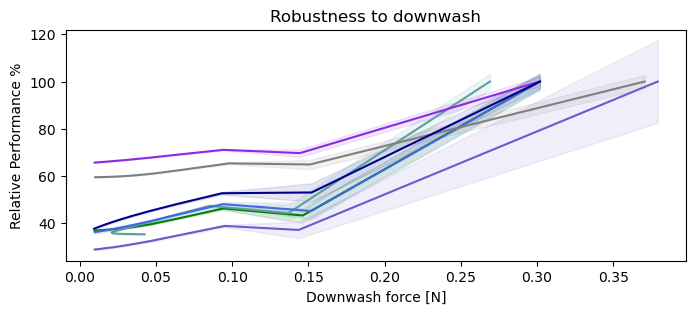

In [60]:
fig = plt.figure(figsize=(8, 3))
for method in noise_data.keys():
    temp1, temp2, temp3 = [], [], []
    for seed_str in noise_data[method]:
        temp1.append(noise_data[method][seed_str]['rmse'])
        temp2.append(noise_data[method][seed_str]['early_stop'])
        temp3.append(noise_data[method][seed_str]['noise_factor'])
    # for i in range(len(temp1)):
    #     print(len(temp1[i]))
    #     print(len(temp1[i]))
    temp1 = np.array(temp1)
    temp2, temp3 = np.array(temp2).mean(axis=0), np.array(temp3).mean(axis=0)

    traj_success_till = 200
    count = len(noise_scale)-1
    temp, temp_std1, temp_std2 = [], [], []
    for k, ns in enumerate(temp3):
        temp.append(temp1[:, k].mean())
        temp_std1.append(temp1[:, k].mean() - 1*temp1[:, k].std())
        temp_std2.append(temp1[:, k].mean() + 1*temp1[:, k].std())
        if temp2[k] > 0.0 and traj_success_till > ns:
            traj_success_till = ns
            count = k
    temp, temp_std1, temp_std2 = np.array(temp), np.array(temp_std1), np.array(temp_std2)
    if method == 'GP-MPC' and noise_option == 'obs_noise':
        traj_success_till += 10
        temp3[count] += 10
    print(f'{method}: {traj_success_till}')
    print(f'{method}: {temp3[count]}')
    
    plt.plot(temp3[:count+1], temp[:count+1]*100/temp[0], color=plot_colors[method], label=method)
    if noise_option in ['obs_noise', 'proc_noise']:
        plt.axvline(x=traj_success_till, linestyle='-.', linewidth=0.5, color=plot_colors[method])
    plt.plot(temp3[count:], temp[count:]*100/temp[0], color=plot_colors[method], linestyle='--')
    
    plt.fill_between(temp3, 
                     temp_std1*100/temp[0],  
                     temp_std2*100/temp[0], color=plot_colors[method], alpha=0.1)
    
    #plt.fill_between([traj_success_till, 100], [1, 1], color='r', alpha=0.25, label=method)


# plt.xscale("log")
# plt.gca().invert_xaxis()
# plt.yscale("log")
plt.xlabel("Noise Scale")
plt.ylabel("Relative Performance %")
if noise_option == 'obs_noise':
    plt.legend(ncol=2)
    plt.ylim(0, 3000)
    plt.xlim(0, 150)
    plt.title("Robustness to observation noise")
    plt.plot(noise_scale, [100]*len(noise_scale), \
             color='grey', linestyle='-.', label='Relative Perf=100%')
    plt.text(102, 2500, 'Linear MPC \nearly stop')
    # plt.text(112, 1900, 'Nonlinear MPC \nearly stop')
    plt.text(112, 1900, 'GP-MPC/Nonlinear \nearly stop')
    plt.text(112, 1400, 'PID \nearly stop')
    plt.text(72, 500, 'iLQR \nearly stop')
    plt.text(112, 170, 'LQR \nearly stop')
    plt.text(112, 770, 'F-MPC \nearly stop')
elif noise_option == 'proc_noise':
    plt.legend(ncol=2, loc='upper right')
    plt.title("Robustness to process noise")
    plt.plot(noise_scale, [100]*len(noise_scale), \
             color='grey', linestyle='-.', label='Relative Perf=100%')
    plt.text(42, 1700, 'Linear MPC \nearly stop')
    plt.text(52, 2100, 'Nonlinear MPC \nearly stop')
    plt.text(102, 1200, 'GP-MPC \nearly stop')
    plt.text(42, 1200, 'PID \nearly stop')
    plt.text(12, 300, 'iLQR \nearly stop')
    plt.text(42, 170, 'LQR \nearly stop')
    plt.text(42, 670, 'F-MPC \nearly stop')
elif noise_option == 'downwash':
    plt.title("Robustness to downwash")
    plt.xlabel("Downwash force [N]")

plt.savefig(f"robustness_model-based_{noise_option}.pdf",bbox_inches="tight", pad_inches=0.1)
plt.savefig(f"robustness_model-based_{noise_option}.png",bbox_inches="tight", pad_inches=0.1)